## Observations and Insights 

Observation #1: The study consisted of slightly more female than male mice
Observation #2: There is a strong correlation between weight and tumor volume
Observation #3: For the 4 most promising treatments (Capomulin, Ramicane, Infubinol, Ceftamin), there is only 1 outlier datapoint (Infubinol).

In [2]:
#%matplotlib ipympl

%matplotlib notebook

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np


In [4]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_study_dataset = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
merged_study_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
number_of_mice = merged_study_dataset['Mouse ID'].nunique()
number_of_mice

249

In [6]:
merged_study_dataset[['Mouse ID', 'Timepoint']].value_counts()

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouseList = []
duplicate_mouse_id_list = []
for x, y in merged_study_dataset.iterrows():
    mid = y['Mouse ID'] +'-'+ str(y['Timepoint'])
    mouseList.append(mid)

[duplicate_mouse_id_list.append(d) for d in mouseList if mouseList.count(d)>1 and d not in duplicate_mouse_id_list]
print("Duplicates")
for k in duplicate_mouse_id_list:
    q = k.split("-")
    qpo = q[0]
    kls = q[1]

    print("Mouse ID: " + qpo + " Timepoint: " + kls)

#pd.Series(mouseList).value_counts()
#duplicate_mouse_id_list
#merged_study_dataset[['Mouse ID','Timepoint']].value_counts().head(15)

Duplicates
Mouse ID: g989 Timepoint: 0
Mouse ID: g989 Timepoint: 5
Mouse ID: g989 Timepoint: 10
Mouse ID: g989 Timepoint: 15
Mouse ID: g989 Timepoint: 20


In [8]:
merged_study_dataset['Duplicate'] = merged_study_dataset.duplicated(subset=['Mouse ID', 'Timepoint'])

merged_study_dataset.loc[merged_study_dataset['Duplicate']== True, :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 



In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_study_dataset.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

cleaned_df =  cleaned_df.drop(['Duplicate'], axis=1)

cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
num_mice = cleaned_df['Mouse ID'].nunique()
num_mice

249

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


In [13]:
#Create Grouped DF
grouped_by_drug = cleaned_df.groupby(['Drug Regimen'])
tumor_column = grouped_by_drug['Tumor Volume (mm3)']



In [14]:
#Calculate Mean
tumor_mean = tumor_column.mean()
tumor_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [15]:
#Calculate Median
tumor_median= tumor_column.median()


In [16]:
#Calculate Variance
tumor_variance = tumor_column.var()

In [17]:
#Calculate Standard Deviation
tumor_std = tumor_column.std()
tumor_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [18]:
#Calculate Standard Error
tumor_sem = tumor_column.sem()
tumor_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

generated_stats_table = pd.DataFrame(
    {
        "mean" : tumor_mean,
        "median" : tumor_median,
        "var" : tumor_variance,
        "std" :tumor_std,
        "sem" :tumor_sem

    }
)


generated_stats_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [20]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_stats_table = tumor_column.aggregate(["mean", "median","var", "std", "sem"])


agg_stats_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


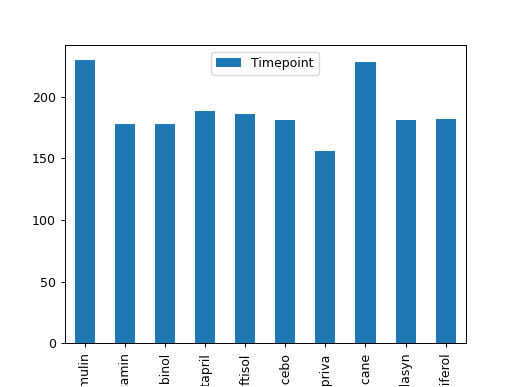

In [110]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoint_data = grouped_by_drug['Timepoint'].count()
timepoint_data.plot(kind='bar', legend = True)

pandas_bar = plt.show();

<IPython.core.display.Javascript object>


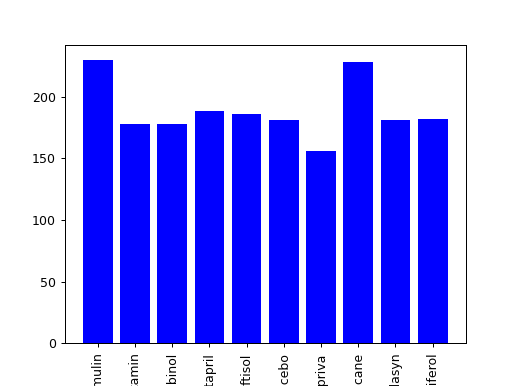

In [108]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_data_plt = grouped_by_drug['Timepoint'].count()
x_axis = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

plt.bar(x_axis, timepoint_data_plt, color='b', align="center");
plt.xticks(rotation='vertical');




<IPython.core.display.Javascript object>


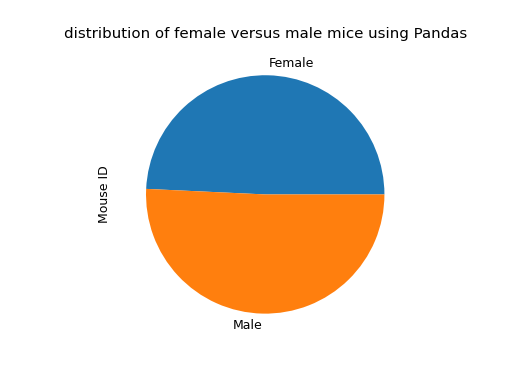

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_sex = cleaned_df.groupby(['Sex'])['Mouse ID'].count()
mouse_sex
pandas_pie = mouse_sex.plot(kind='pie');
pandas_pie.set_title('Distribution of female versus male mice using Pandas');

<IPython.core.display.Javascript object>


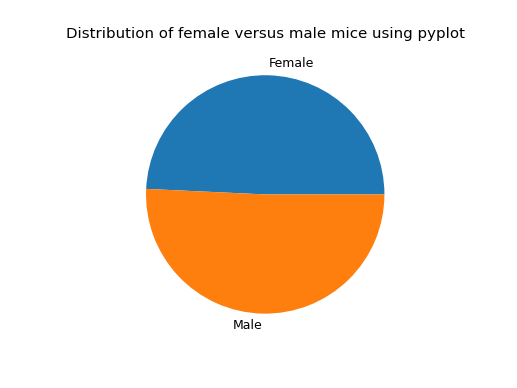

Text(0.5, 1.0, 'Distribution of female versus male mice using pyplot')

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
mouse_sex = cleaned_df.groupby(['Sex'])['Mouse ID'].count();

plt_pie = plt.pie(mouse_sex, labels=labels);
plt.title('Distribution of female versus male mice using pyplot');

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_df.groupby(['Mouse ID'])['Timepoint'].max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_df = pd.DataFrame(last_timepoint)
cleaned_df_copy = cleaned_df
final_tumor_vol_df = last_timepoint_df.merge(cleaned_df, on=['Mouse ID','Timepoint'])

final_tumor_vol_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_list = []
colNames = list(final_tumor_vol_df)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in final_tumor_vol_df.iterrows():
    if row['Drug Regimen'] in treatment_list:
        lst = []
        for i in range(len(row)):
            lst.append(row[i])
        tumor_vol_data_list.append(lst)
        


    
    # add subset 
drug_subset_df = pd.DataFrame(tumor_vol_data_list, columns = colNames)
tumor_vol_subset = drug_subset_df['Tumor Volume (mm3)']
    # Determine outliers using upper and lower bounds
quartiles = tumor_vol_subset.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile of tumor volume is: 37.1877438025
The upper quartile of tumor volume is: 59.930261755
The interquartile range of tumor volume is: 22.742517952499995
The the median of tumor volume is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


In [28]:
drug_tumor_subset_df = drug_subset_df[['Drug Regimen', 'Tumor Volume (mm3)']]

In [30]:
data_list = []

for drug in treatment_list:
    drug_data_list = []
    for index, row in drug_tumor_subset_df.iterrows():
        if row[0] == drug:
            drug_data_list.append(row[1])
    
    data_list.append(drug_data_list)    


# grouped_drug_subset = drug_tumor_subset_df.groupby(['Drug Regimen'])



# drug_regimen_list = []

# for x in list(grouped_drug_subset):
#     data_list.append(x[1])
#     drug_regimen_list.append(x[0])

In [31]:
data_Capomulin = np.array(data_list[0])
data_Ramicane = np.array(data_list[1])
data_Infubinol = np.array(data_list[2])
data_Ceftamin = np.array(data_list[3])

In [32]:
data = [data_Capomulin, data_Ceftamin, data_Infubinol, data_Ramicane]

<IPython.core.display.Javascript object>


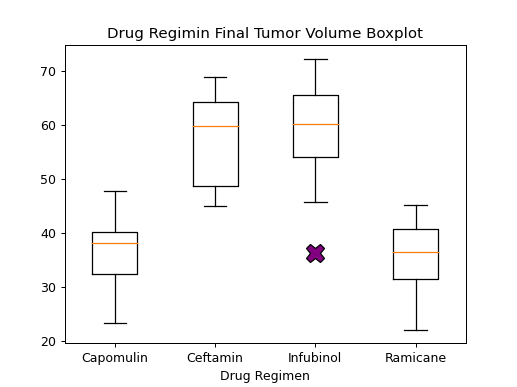

In [91]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
labels = ['Capomulin','Ceftamin','Infubinol','Ramicane']
flps = dict(markerfacecolor='purple', marker='X', markersize=15)
ax1.boxplot(data, flierprops = flps, labels=labels);
ax1.set_title('Drug Regimin Final Tumor Volume Boxplot');
plt.xlabel('Drug Regimen');


## Line and Scatter Plots

<IPython.core.display.Javascript object>


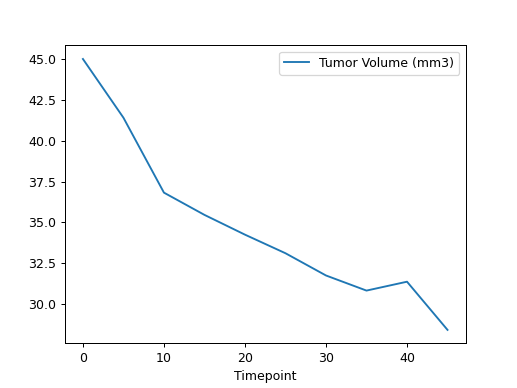

In [66]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Mouse m601
m601_lst = []
for index, row in cleaned_df.iterrows():
    if row['Mouse ID'] == 'm601':
        lst = []
        for i in range(len(row)):
            lst.append(row[i])
        m601_lst.append(lst)

colNames = list(cleaned_df)

df_m601 = pd.DataFrame(m601_lst, columns = colNames)
df_m601_subset = df_m601[['Tumor Volume (mm3)','Timepoint']]
df_m601_subset.plot.line(y='Tumor Volume (mm3)', x='Timepoint');


<IPython.core.display.Javascript object>


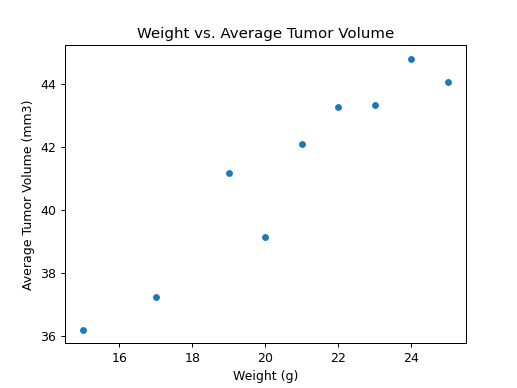

In [90]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
lst_Capomulin =[]
for index, row in cleaned_df.iterrows():
    if row['Drug Regimen'] == 'Capomulin':
        lst = []
        for i in range(len(row)):
            lst.append(row[i])
        lst_Capomulin.append(lst)

colNames = list(cleaned_df)

df_Capomulin = pd.DataFrame(lst_Capomulin, columns = colNames)

df_Capomulin_subset = df_Capomulin[['Tumor Volume (mm3)', 'Weight (g)']]

grouped_by_weight = df_Capomulin_subset.groupby(['Weight (g)'])

df3 = grouped_by_weight.mean()
df_weight_avg_vol = df3.reset_index(level=0)

avg_scatter_chart = df_weight_avg_vol.plot.scatter(y='Tumor Volume (mm3)', x='Weight (g)');

avg_scatter_chart.set_ylabel('Average Tumor Volume (mm3)');
avg_scatter_chart.set_title('Weight vs. Average Tumor Volume');

## Correlation and Regression

In [87]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
weight = df_weight_avg_vol['Weight (g)']
avg_vol = df_weight_avg_vol['Tumor Volume (mm3)']

correlation = st.pearsonr(weight,avg_vol)
print(f"The correlation coefficient is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(weight,avg_vol)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is: {line_eq}")

The correlation coefficient is 0.95
The linear regression model is: y = 0.89x + 22.76
